### Demo HW7: Brachistochrone

The euler lagrange equation for the variational problem $$\min_{y(x)} \int\limits_\Omega\mathcal{F}\left({y,y^\prime; x}\right) $$ is given by $$\frac{\partial\mathcal{F}}{\partial y} - \frac{\rm d}{\rm dx}\left(\frac{\partial\mathcal{F}}{\partial y^{\prime}} \right) = 0 $$

Now, for the specific case when $$\mathcal{F}\left(y,y';x \right) = \sqrt{\frac{1+y'^2}{y}} $$we arrived at the following ODE for $y(x)$ $$y(1+y'^2) = K$$A natural way forward would be to keep integrating as suggested by one of you in the class. Indeed after rearranging the ODE as $$\int_\limits{0}^y\sqrt{\frac{y}{K-y}} dy = \int\limits_0^x dx, $$using the substitution $y=K\cos^2\theta$ and proceeding to find $x(\theta)$, we get the desired solution. This should be straightforward. 

### Problem 2: Plotting the Brachistochrone

In [1]:
# The below example illustrates the plotting of Brachistochrone
# Please use this notebook as a help and not for copying verbatim
# An interesting exercise could be to test different guesses for the 
# nonlinear solver
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [43]:
plt.rc('text',usetex=True)
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts,amssymb,bm}"]
plt.rcParams['font.weight'] = 700
plt.rcParams['xtick.top']='True'
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.right']='True'
plt.rcParams['ytick.direction']='in'
plt.rcParams['ytick.labelsize']=24
plt.rcParams['xtick.labelsize']=24
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.major.size']=6
plt.rcParams['xtick.minor.size']=3
plt.rcParams['ytick.major.size']=6
plt.rcParams['ytick.minor.size']=3
plt.rcParams['lines.markersize']=np.sqrt(36) 

In [3]:
from scipy.optimize import root, fsolve

In [4]:
def calc_time(params):
    K, t = params
    # the corresponding `x` and `y`
    return np.array([K/2*(t - np.sin(t)) - 10, K/2*(1-np.cos(t)) - 2])

def jac_calc_time(params):
    K, t = params
    # calculates the jacobian of the above function
    return np.array([[1./2*(np.sin(t)), K/2.*(1-np.cos(t))],[1./2*(1-np.cos(t)), K/2.*(np.sin(t))]])

In [5]:
sol=root(calc_time,[5,2],method='hybr',jac=jac_calc_time,tol=1.e-15,options={'maxfev':1000000})

In [6]:
calc_time(sol.x)

array([0.0000000e+00, 4.4408921e-16])

In [7]:
sol.x

array([3.5793191 , 4.59458571])

In [8]:
tfinal = np.linspace(0.,sol.x[-1],100)

In [9]:
K,T = sol.x

In [10]:
x = K/2*(tfinal - np.sin(tfinal))

In [11]:
y = -K/2*(1-np.cos(tfinal))
ystraight_line = lambda xf: (y[-1]-y[0])/(x[-1]-x[0])*(xf - x[-1]) + y[-1]

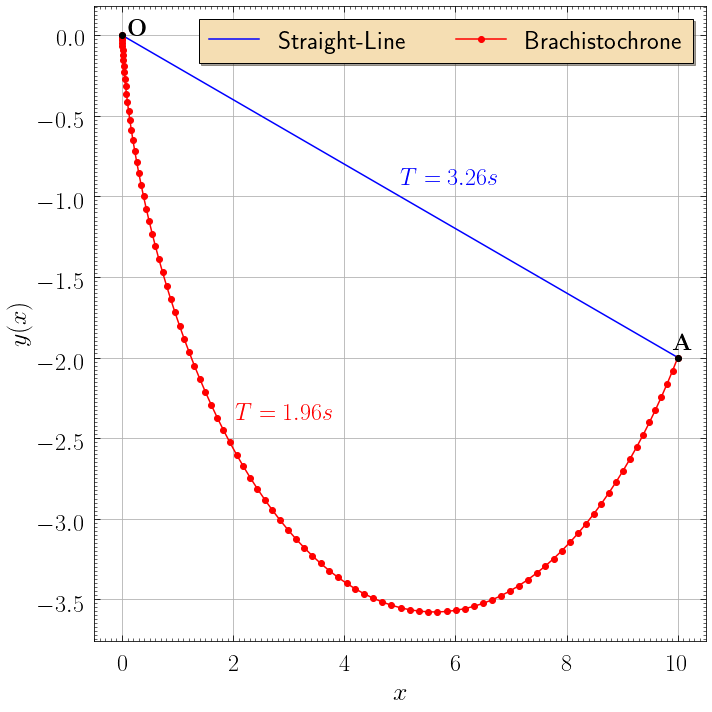

In [44]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(x,ystraight_line(x),'b-',label='Straight-Line')
ax.plot(x,y,'-ro',label='Brachistochrone')
ax.plot([0],[0],'ko')
ax.plot([10],[-2],'ko')
ax.legend(loc='upper right',fontsize=25,ncol=2,fancybox=False,facecolor='wheat',edgecolor='k',shadow=True)
ax.set_xlabel(r'$x$',fontsize=26)
ax.set_ylabel(r'$y(x)$',fontsize=26)
ax.grid(which='major')
ax.xaxis.set_minor_locator(AutoMinorLocator(20))
ax.yaxis.set_minor_locator(AutoMinorLocator(20))
ax.tick_params(axis='both',pad=10)
ax.text(0.1,0,r'\bf O',fontsize=24)
ax.text(9.9,-1.95,r'\bf A',fontsize=24)
ax.text(0.23,0.35,r'$T = 1.96s$',fontsize=24,color='red',transform=ax.transAxes)
ax.text(0.5,0.72,r'$T = 3.26s$',fontsize=24,color='blue',transform=ax.transAxes)
fig.tight_layout()
fig.savefig(os.path.join(cdir,'Figure_Brachistochrone.eps'))
# plt.show()

In [12]:
import os
cdir=os.getcwd()
cdir

'D:\\TA\\Fall2019\\CEE471_Fall2019'